# Learning Curves

Learning curves can be a great tool to diagnose a machine learning model. They will tell you wether the patterns a model learns during training generalize and also apply on the test set. Generalizing is an important property of a model, we want models to work well on unseen data, not only on the training data.

I'll show how to plot and interpret learning curves on an artificial dataset, the same as we used to demonstrate overfitting and underfitting.

## Dataset

In [9]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=50, noise=0.2, factor=0.3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [10]:
from mlxtend.plotting import plot_decision_regions, plot_learning_curves, category_scatter

%matplotlib inline

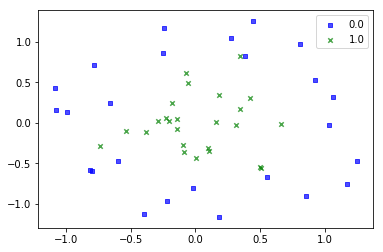

In [11]:
import numpy as np

_ = category_scatter(x=0, y=1, label_col=2, data=np.column_stack((X, y)))

## Background

Learning curves can be used as tools for diagnosing a machine learning model. They are a plot of dataset size versus training/test error, showing you how well the patterns the model learns describe the dataset and how well they generalize.

With such a learning curve you can diagnose wether your model is underfit, just right or overfit. Let's first show what that means. Underfit means the model was too simple for the data. Overfit means the model is overly complex:

![Underfit and overfit](img/under_over_fit.jpg)

By plotting learning curves you can diagnose such a situation by looking at the error on the training and test data:

![Learning curves](img/learning_curve.png)

There is three main situations to recognise:

* **Underfit** : The error on training and test set is both high. The model was too simple and could not explain the data well.
* **Just right** : The error on training and test set is both low. The model has learned good patterns and can explain the data.
* **Overfit** : The error on training set is (very) low, but the error on the test set is high. The model is fitted to closely to the training data and the learned patterns work well there but are too specific. The learned patterns don't apply well too the test data.

## Underfitted situation

Underfitting means our model is to "simple", the patters it learns are not a good (enough) description of the data. We'll apply logistic regression to a the dataset with concentric circles. Let's plot the decision boundary and the learning curve.

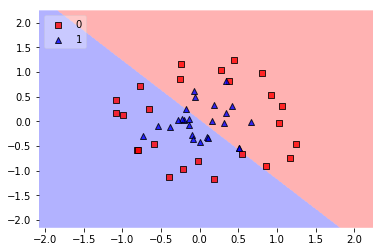

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)
_ = plot_decision_regions(X, y, clf, legend=2)

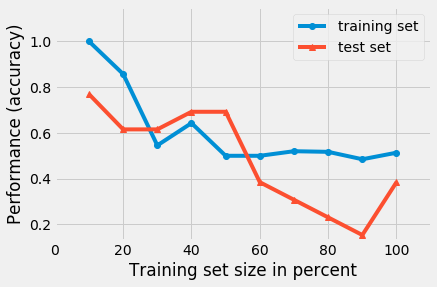

In [13]:
_ = plot_learning_curves(X_train, y_train, X_test, y_test, LogisticRegression(), scoring='accuracy', print_model=False)

What you see in the learning curve is that the model fits neither the training nor the test data well. Accuracy is always low here, hovering around the 50% area. This is a typical pattern in the learning curve for underfitting, the errors on both the training and test data are high.

So for this dataset, we need to use a different model to get good results.

## Good fitting situation

If a model does manage to fit the data well and learns suitable patterns, we expect the learning curves to converge and show good performance on both the training and the test data.

For this dataset we can achieve that with a SVM classifier.

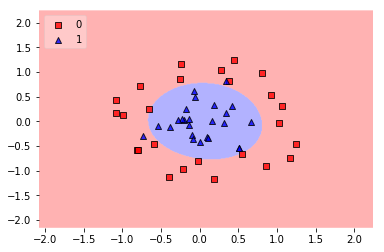

In [14]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X, y)
_ = plot_decision_regions(X, y, clf, legend=2)

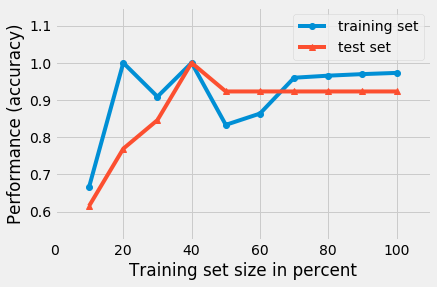

In [15]:
_ = plot_learning_curves(X_train, y_train, X_test, y_test, SVC(), scoring='accuracy', print_model=False)

## Overfitting situation

In an overfitting situation, the model learns patterns that apply very well to the training data, but only there. So the model doesn't generalize well. It has become to specific for the training data. These can be many reasons for this, but large complex models and/or little training data can contribute for example.

What you will see in a learning curve plot here, is a low error (high accuracy) for the training data. And high error (low accuracy) on the test data.